In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
os.getcwd()

'D:\\Jigsaw\\4.Python'

In [21]:
data.isnull().sum()

City     0
NO2      0
PM10     0
SO2      0
State    0
dtype: int64

In [22]:
data=pd.read_csv("pollution_india_2010.csv",na_values='Null')

In [23]:
data.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9.0,39.0,4.0,Andhra Pradesh
1,Guntur,11.0,81.0,2.0,Andhra Pradesh
2,Hydrabad,24.0,79.0,5.0,Andhra Pradesh
3,Kothagudem,11.0,62.0,2.0,Andhra Pradesh
4,Kurnool,9.0,85.0,4.0,Andhra Pradesh


In [24]:
data_pol=data.groupby('State',as_index=False)[['NO2','PM10','SO2']].agg(sum)

In [25]:
data_pol.head()

,State,NO2,PM10,SO2
0,Andhra Pradesh,183.0,893.0,60.0
1,Assam,177.0,834.0,74.0
2,Bihar,40.0,181.0,7.0
3,Chandigarh,16.0,92.0,2.0
4,Chattisgarh,105.0,502.0,45.0


In [26]:
#Scale the data , sing pandas
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_num=data_pol.drop("State",axis=1)
data_scaled=data_num.apply(scale,axis=0) 

In [28]:
data_scaled.head()

,NO2,PM10,SO2
0,0.230500,0.377853,-0.006831
1,0.191898,0.277417,0.178067
2,-0.689503,-0.834188,-0.706801
3,-0.843909,-0.985693,-0.772836
4,-0.271320,-0.287748,-0.204936


In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [31]:
data_scaled=np.array(data_scaled)

In [32]:
Z=linkage(data_scaled,method="ward")
#single, complete, average

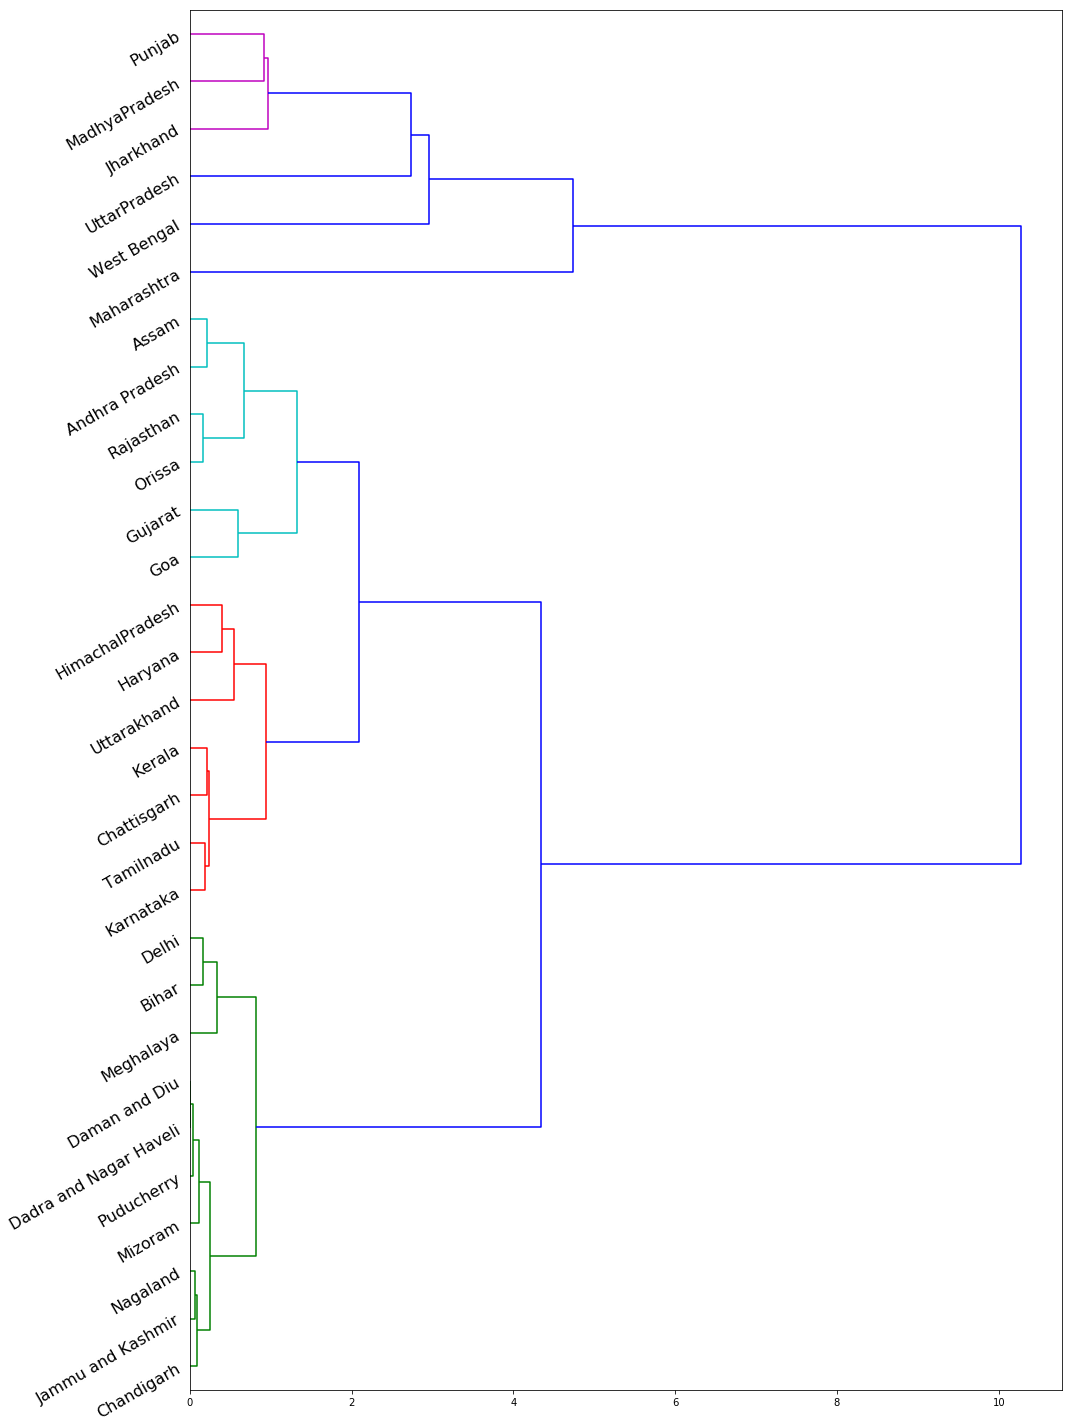

In [33]:
fig, ax = plt.subplots(figsize=(15,20))
ax=dendrogram(Z,orientation="right",labels=np.array(data_pol['State']),leaf_rotation=30,leaf_font_size=16,color_threshold=2)
        #(truncate_mode = 'lasfp',p=4,show_contracted=True)
    
plt.tight_layout()
plt.show()

In [34]:
assignments=fcluster(linkage(data_scaled,method="ward"),4,'distance')

In [35]:
assignments

array([2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 3, 2, 2, 3, 4, 1, 1, 1, 2,
       1, 3, 2, 2, 3, 2, 3], dtype=int32)

In [36]:
from sklearn.cluster import AgglomerativeClustering